In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
tips = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.shape

(244, 7)

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
tips[['total_bill', 'tip', 'size']].describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
151,13.13,2.00,Male,No,Sun,Dinner,2
233,10.77,1.47,Male,No,Sat,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [7]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
tips['tip15'] = tips['total_bill'] * 0.15
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip15
0,16.99,1.01,Female,No,Sun,Dinner,2,2.5485
1,10.34,1.66,Male,No,Sun,Dinner,3,1.5510
2,21.01,3.50,Male,No,Sun,Dinner,3,3.1515
3,23.68,3.31,Male,No,Sun,Dinner,2,3.5520
4,24.59,3.61,Female,No,Sun,Dinner,4,3.6885


In [9]:
tips['good_tip'] = np.where(tips['tip'] >= tips['tip15'], True, False)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip15,good_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,2.5485,False
1,10.34,1.66,Male,No,Sun,Dinner,3,1.5510,True
2,21.01,3.50,Male,No,Sun,Dinner,3,3.1515,True
3,23.68,3.31,Male,No,Sun,Dinner,2,3.5520,False
4,24.59,3.61,Female,No,Sun,Dinner,4,3.6885,False


In [10]:
tips['good_tip'] = tips['tip'] >= tips['tip15']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip15,good_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,2.5485,False
1,10.34,1.66,Male,No,Sun,Dinner,3,1.5510,True
2,21.01,3.50,Male,No,Sun,Dinner,3,3.1515,True
3,23.68,3.31,Male,No,Sun,Dinner,2,3.5520,False
4,24.59,3.61,Female,No,Sun,Dinner,4,3.6885,False


In [17]:
tips[tips['total_bill'] > 10][['tip', 'total_bill']].head()

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59


In [19]:
tips.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [27]:
tips.groupby('day').agg({'day': np.size, 'tip':np.mean})

,day,tip
day,,
Fri,19,2.734737
Sat,87,2.993103
Sun,76,3.255132
Thur,62,2.771452


<AxesSubplot:ylabel='sex'>

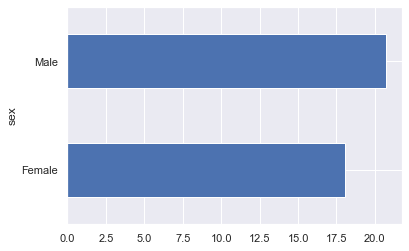

In [29]:
tips.groupby('sex')['total_bill'].mean().plot(kind='barh')

In [30]:
tips.groupby(['smoker', 'day']).agg({'tip': [np.size, np.mean]})

tip          
            size      mean
smoker day                
No     Fri     4  2.812500
       Sat    45  3.102889
       Sun    57  3.167895
       Thur   45  2.673778
Yes    Fri    15  2.714000
       Sat    42  2.875476
       Sun    19  3.516842
       Thur   17  3.030000

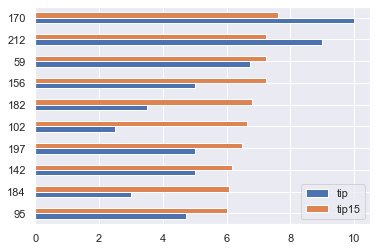

In [11]:
tips.sort_values('total_bill', ascending=True)[['tip', 'tip15']].tail(10).plot(kind='barh');